## Question Answer Workflow in LangGraph

In [21]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv

In [22]:
load_dotenv()

True

In [33]:
model = ChatGroq(model="openai/gpt-oss-20b")

In [34]:
# create a state 

class LLMState(TypedDict):
    question: str
    answer: str

In [35]:
def llm_qa(state: LLMState) -> LLMState: 
    # extract the question from the state
    question = state["question"]

    # form the prompt
    prompt = f"Answer the following Question: {question}"

    # ask question to model 
    result = model.invoke(prompt).content

    # update the state with the answer
    state["answer"] = result
    return state

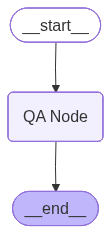

In [36]:
# Create our graph
graph = StateGraph(LLMState)

# add nodes 
graph.add_node("QA Node", llm_qa)

# add edges
graph.add_edge(START, "QA Node")
graph.add_edge("QA Node", END)

workflow = graph.compile()

workflow

In [37]:
# execute 
initial_state = {"question": "What is the capital of France?"}
final_state = workflow.invoke(initial_state)
print(final_state)

{'question': 'What is the capital of France?', 'answer': 'The capital of France is Paris.'}
